<a href="https://colab.research.google.com/github/ShitalPandirkar/Book-Recommendation-System/blob/Regression-Project/Appliance_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Appliance Energy Prediction
Project Type - Regression
Contribution - Individual
Team Member 1 - Shital Pandirkar

Project Summary -

The project revolves around predicting energy consumption for various household appliances using a diverse set of features. By leveraging regression techniques, this project aims to uncover the intricate relationships between temperature, humidity, weather conditions, and other variables to achieve accurate energy consumption predictions.

The dataset employed in this project encompasses a comprehensive range of factors that influence energy consumption. It includes temperature measurements in different rooms, humidity levels, weather data from the nearest airport station, and even the time of day. Each entry in the dataset represents a 10-minute interval over a span of 4.5 months. Such rich and dynamic data offers an excellent opportunity to explore patterns and build predictive models.

It demonstrates the application of regression techniques to a real-world problem, offering insights into the relationships between environmental factors and appliance energy consumption. Through diligent data preprocessing, exploratory analysis, and model training, this project equips me with essential skills to tackle similar challenges in the future.

In conclusion, the Appliance Energy Prediction project stands as a testament to the power of data-driven insights and predictive modeling in addressing complex real-world challenges. By effectively harnessing the capabilities of data science.

GitHub Link -

**Problem Statement**

The Appliance Energy Prediction project aims to develop a predictive model that accurately estimates the energy consumption of various household appliances based on a diverse set of environmental and weather-related features. By leveraging machine learning techniques, the project seeks to uncover the underlying relationships between temperature, humidity, weather conditions, and other variables to enable more informed energy consumption management and optimization.

*1. Know Your Data*

Import Libraries

In [1]:
#install eli5 package
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=6f52a3505c2f37bfa6682cc6d5cd659875d92aa1c0099a9d4f57cd61d8ead80e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [41]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib
import eli5
from eli5.sklearn import PermutationImportance

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Loading

In [4]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/almabetter/Cohort Seattle/Regression project/data_application_energy.csv')

Dataset First View

In [5]:
# Dataset First Look
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print("row_count:", data.shape[0] ,"column_count:", data.shape[1])

row_count: 19735 column_count: 29


Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Duplicate Value

In [8]:
# Dataset Duplicate Value Count
print('Number of duplicate tupples:',data.duplicated().sum())

Number of duplicate tupples: 0


Missing Null Value

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

*2. Understanding Your Variables*

In [10]:
# Dataset Columns
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include = 'all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


Variables Description
T1: Temperature in kitchen area, in Celsius

T2: Temperature in living room area, in Celsius

T3: Temperature in laundry room area, in Celsius

T4: Temperature in office room, in Celsius

T5: Temperature in bathroom, in Celsius

T6: Temperature outside the building (north side), in Celsius

T7: Temperature in ironing room , in Celsius

T8: Temperature in teenager room 2, in Celsius

T9: Temperature in parents room, in Celsius

RHI: Humidity in kitchen area, in %

RH2: Humidity in living room area, in %

RH3: Humidity in laundry room area, in %

RH4: Humidity in office room, in %

RH5: Humidity in bathroom, in %

RH6: Humidity outside the building (north side), in %

RH7: Humidity in ironing room, in %

RH8: Humidity in teenager room 2,in %

RH9: Humidity in parents room, in %

To: Temperature outside (from Chievres weather station), in Celsius

Pressure: (from Chievres weather station), in mm Hg

Hg RHout: Humidity outside (from Chievres weather station), in %

Wind speed: (from Chievres weather station), in m/s

Visibility: (from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), A*C

Appliances, energy use in Wh: Dependent variable

Check Unique Values for each variable.


In [12]:
# Check Unique Values for each variable.
print('\n')
print('Unique value count for each column:')

for col in data.columns:
  print(col,':',len(data[col].unique()))

print('\n')
print('\n')
print('Unique values in Appliances columns: \n',np.sort(data['Appliances'].unique()))
print('\n')
print('Unique values in lights columns:',np.sort(data['lights'].unique()))
print('\n')
print('Rest of the columns are of float type so the have so many unique values.')



Unique value count for each column:
date : 19735
Appliances : 92
lights : 8
T1 : 722
RH_1 : 2547
T2 : 1650
RH_2 : 3376
T3 : 1426
RH_3 : 2618
T4 : 1390
RH_4 : 2987
T5 : 2263
RH_5 : 7571
T6 : 4446
RH_6 : 9709
T7 : 1955
RH_7 : 5891
T8 : 2228
RH_8 : 6649
T9 : 924
RH_9 : 3388
T_out : 1730
Press_mm_hg : 2189
RH_out : 566
Windspeed : 189
Visibility : 413
Tdewpoint : 1409
rv1 : 19735
rv2 : 19735




Unique values in Appliances columns: 
 [  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480  490  500  510  520  530  540  550  560
  570  580  590  600  610  620  630  640  650  660  670  680  690  700
  710  720  730  740  750  760  770  780  790  800  820  830  840  850
  860  870  880  890  900  910 1070 1080]


Unique values in lights columns: [ 0 10 20 30 40 50 60 70]


Rest of the columns are of float 

3. *Data Wrangling*

Data Wrangling Code

In [13]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the hour from the 'date' column
data['hour'] = data['date'].dt.hour

*4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

Chart - 1

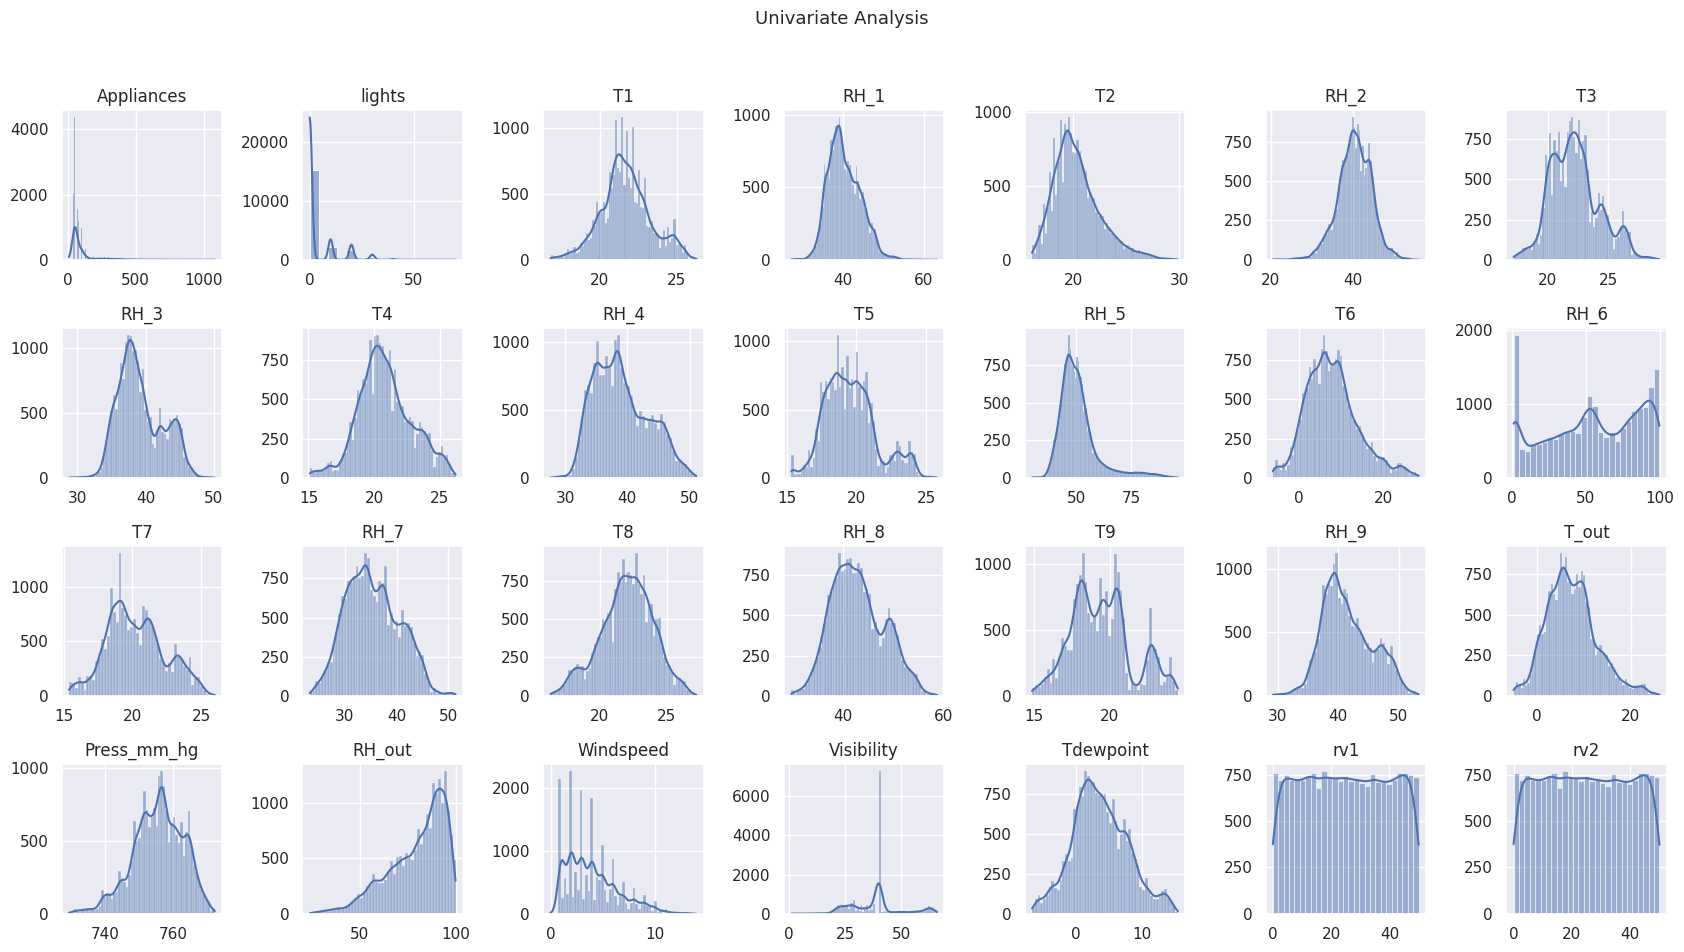

In [14]:
# Chart - 1 visualization code
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(17, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column (excluding 'date' and 'Appliances')
for i, column in enumerate(data.columns):
    if column not in ['date','light','hour']:
        ax = axes[i-1]
        sns.histplot(data[column], ax=ax, kde=True)
        ax.set_title(column, fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True)
        plt.subplots_adjust(hspace=0.5)


plt.tight_layout(rect=[0, 0.03, 1, 0.92])

#Give title
plt.suptitle('Univariate Analysis', fontsize = 13)

plt.show()

Chart - 2

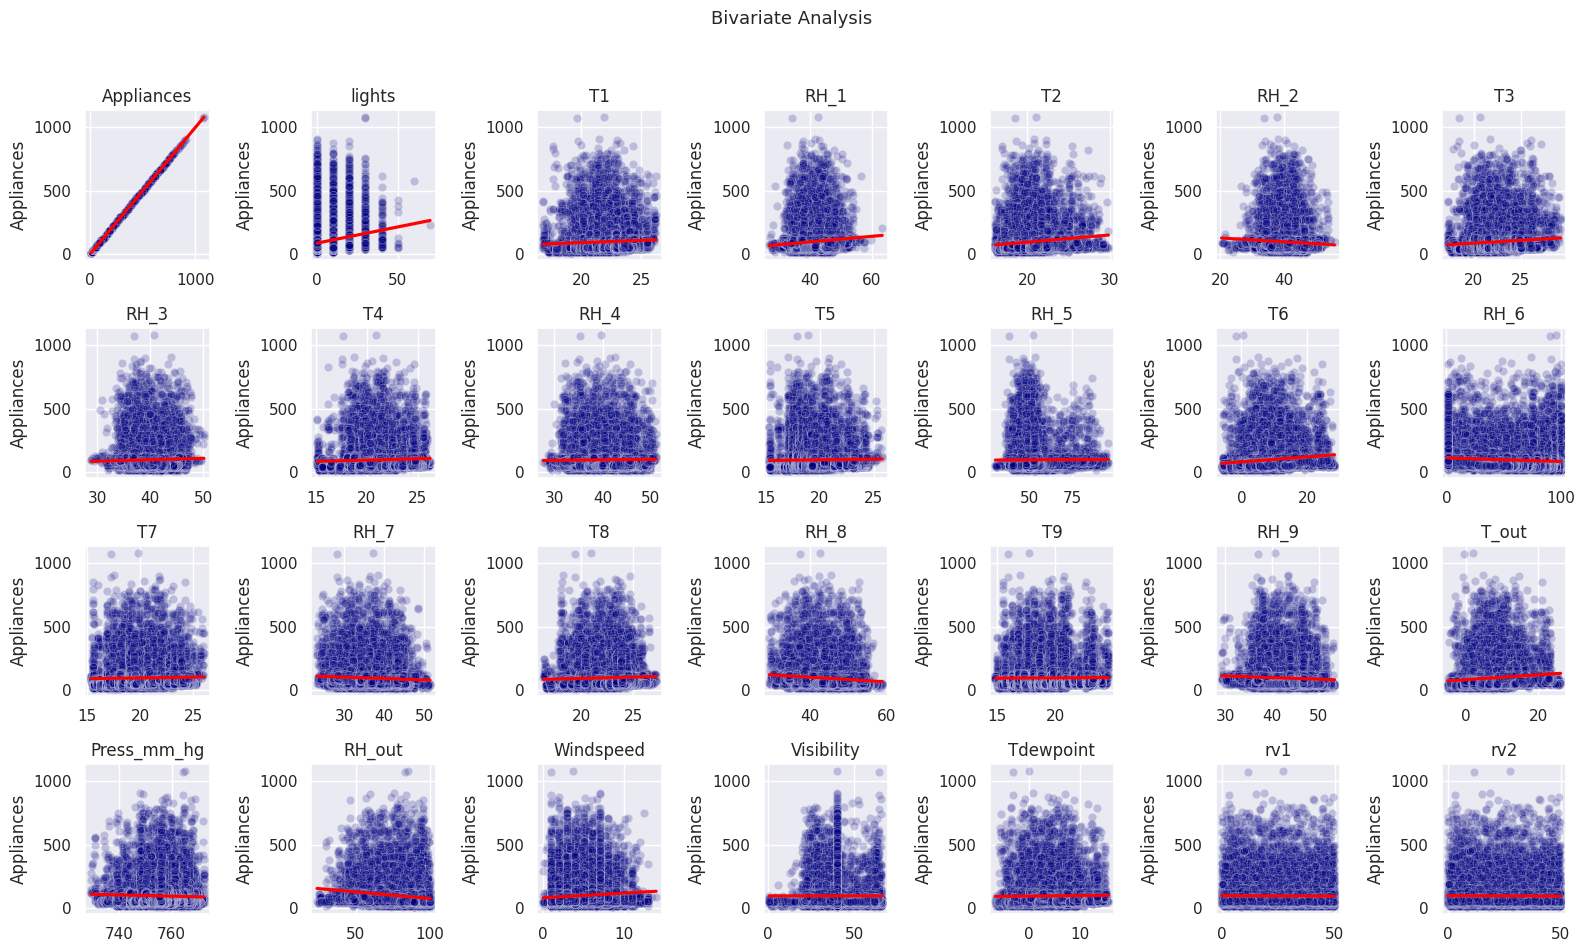

In [15]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(16, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Loop through each column (excluding 'date' and 'Appliances')
for i, column in enumerate(data.columns):
    if column not in ['date','light','hour']:
        ax = axes[i-1]
        sns.scatterplot(data=data, x=column, y='Appliances', ax=ax, color='navy'  ,alpha=0.2)
        sns.regplot(data=data, x=column, y='Appliances', ax=ax, scatter=False, color='red')
        ax.set_title(column, fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Appliances')
        ax.grid(True)
        plt.subplots_adjust(hspace=0.5)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.92])

#Give title
plt.suptitle('Bivariate Analysis', fontsize = 13)

# Show the plot
plt.show()

Chart - 3

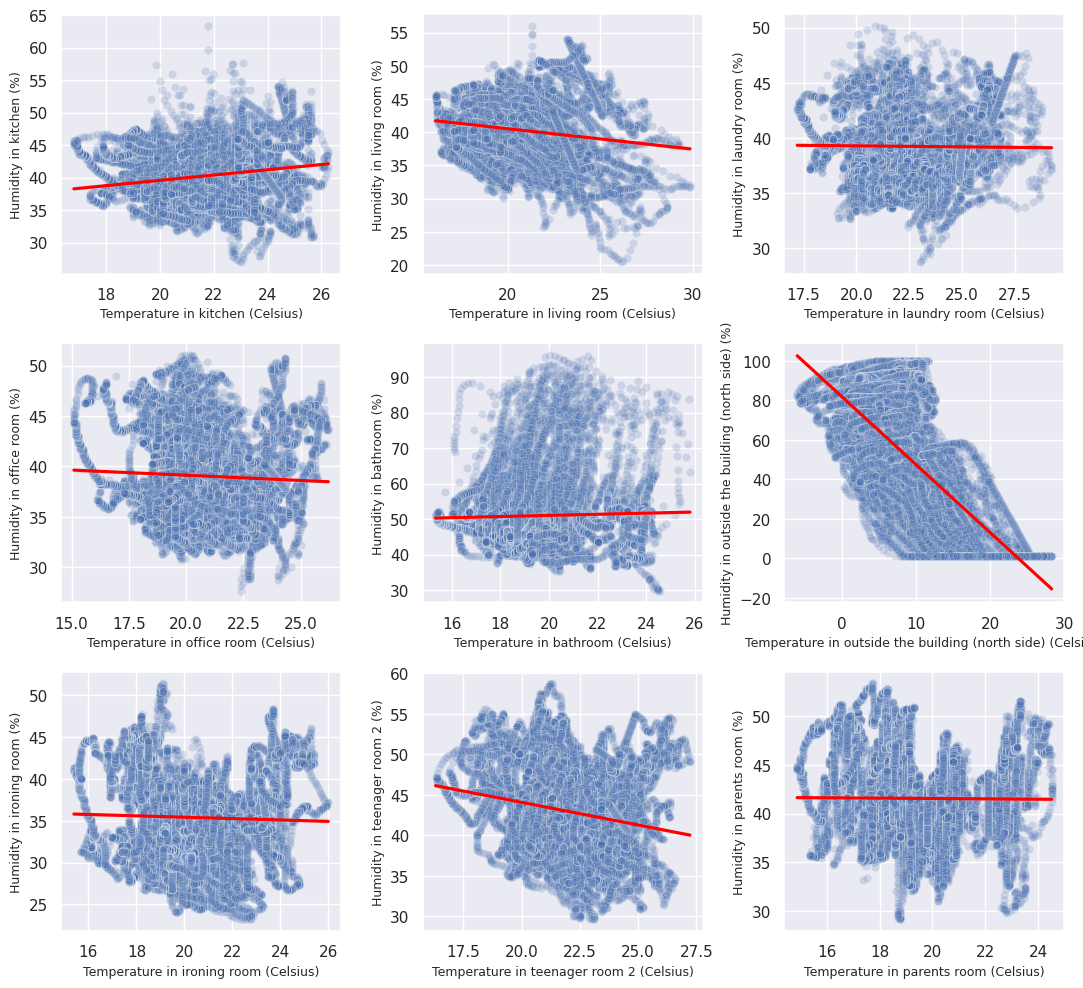

In [16]:
# Chart - 3 visualization code
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of T columns
t_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

# List of locatin
location = ['kitchen', 'living room', 'laundry room', 'office room', 'bathroom', 'outside the building (north side)', 'ironing room', 'teenager room 2', 'parents room']

# Loop through each T column
for i, t_column in enumerate(t_columns):
    rh_column = 'RH_' + str(i + 1)
    loc = location[i]
    ax = axes[i]

    # Scatter plot
    sns.scatterplot(data=data, x=t_column, y=rh_column, alpha=0.2, ax=ax)

    # Regression line
    sns.regplot(data=data, x=t_column, y=rh_column, scatter=False, color='red', ax=ax)

    ax.set_xlabel(f'Temperature in {loc} (Celsius)', fontsize = 9)
    ax.set_ylabel(f'Humidity in {loc} (%)', fontsize = 9)

plt.tight_layout()
plt.show()

Chart - 4

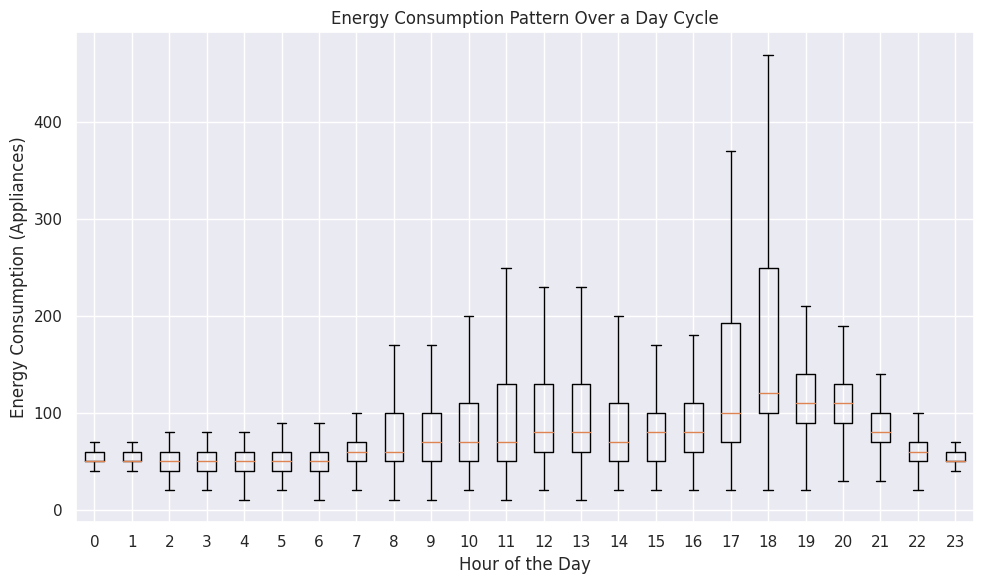

In [17]:
# Chart - 4 visualization code

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['hour'] == h]['Appliances'] for h in range(24)], showfliers=False)
plt.title('Energy Consumption Pattern Over a Day Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (Appliances)')
plt.xticks(range(1, 25), labels=range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

Chart - 5

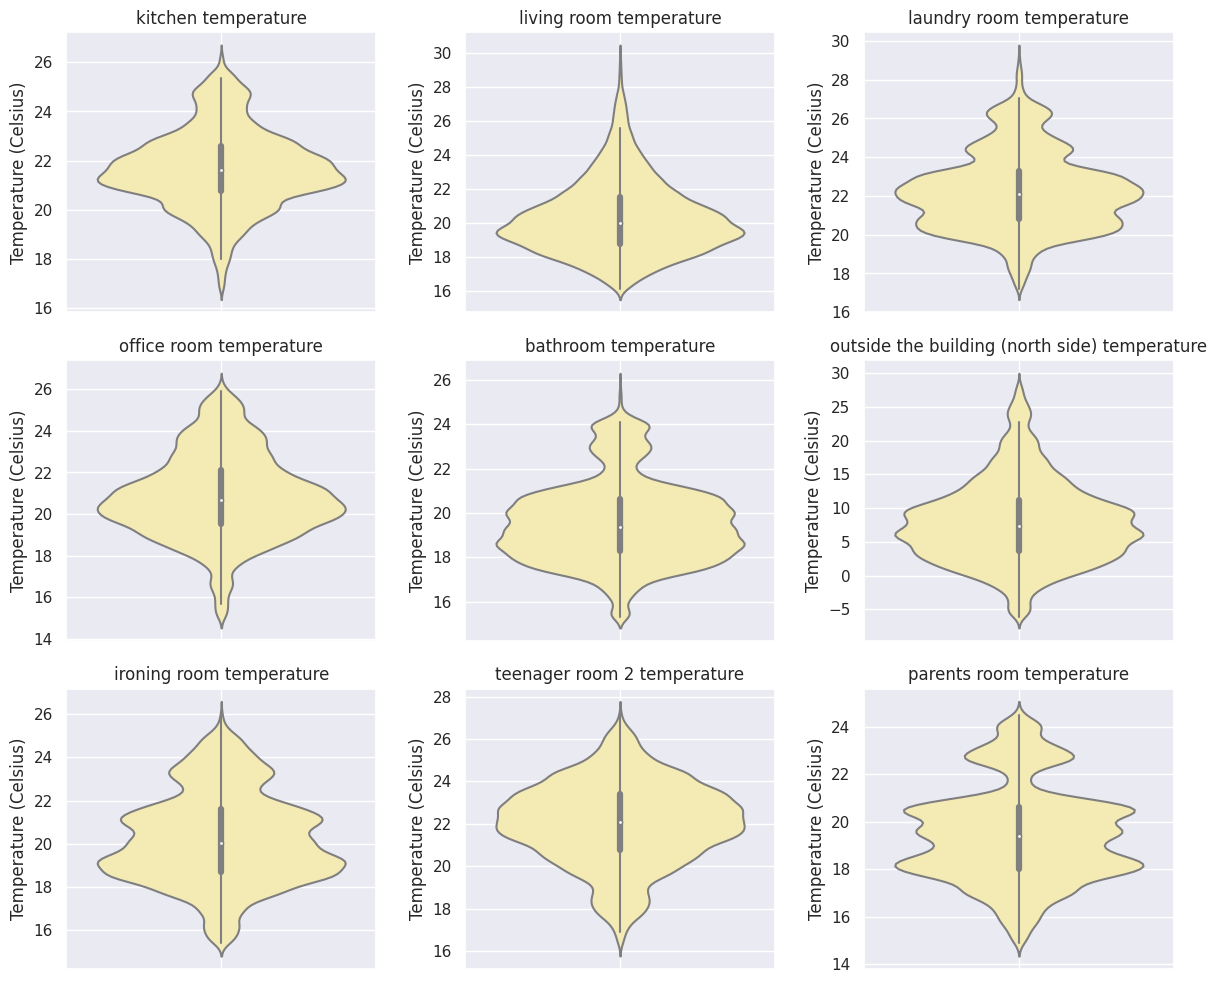

In [18]:
# Chart - 5 visualization code

# List of T columns
t_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

# List of RH columns
rh_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']


# List of locatin
location = ['kitchen', 'living room', 'laundry room', 'office room', 'bathroom', 'outside the building (north side)', 'ironing room', 'teenager room 2', 'parents room']

# Set color palettes for T and RH plots
t_palette = sns.color_palette("YlOrRd", n_colors=len(t_columns))

rh_palette = sns.color_palette("GnBu", n_colors=len(rh_columns))

# Create subplots for T variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, t_column in enumerate(t_columns):
    ax = axes[i]
    loc = location[i]
    sns.violinplot(data=data, y=t_column, ax=ax, palette=t_palette)
    ax.set_title(f'{loc} temperature')
    ax.set_ylabel('Temperature (Celsius)')
    ax.grid(True)

plt.tight_layout()
plt.show()

Chart - 6

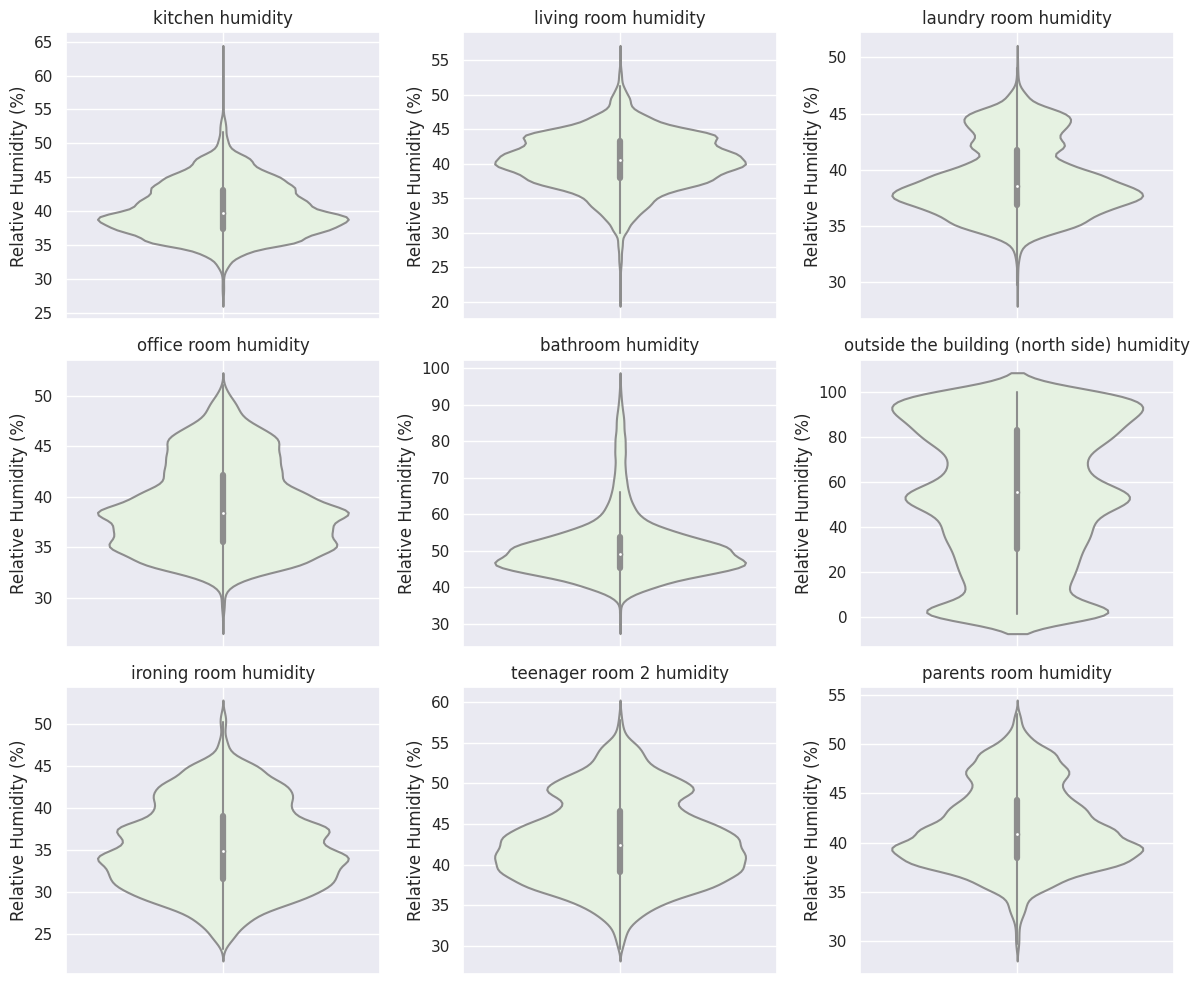

In [19]:
# Chart - 6 visualization code

# List of RH columns
rh_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']


# List of locatin
location = ['kitchen', 'living room', 'laundry room', 'office room', 'bathroom', 'outside the building (north side)', 'ironing room', 'teenager room 2', 'parents room']


# Create subplots for RH variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, rh_column in enumerate(rh_columns):
      ax = axes[i]
      loc = location[i]
      sns.violinplot(data=data, y=rh_column, ax=ax, palette=rh_palette)
      ax.set_title(f'{loc} humidity')
      ax.set_ylabel('Relative Humidity (%)')
      ax.grid(True)

plt.tight_layout()
plt.show()

Chart - 7

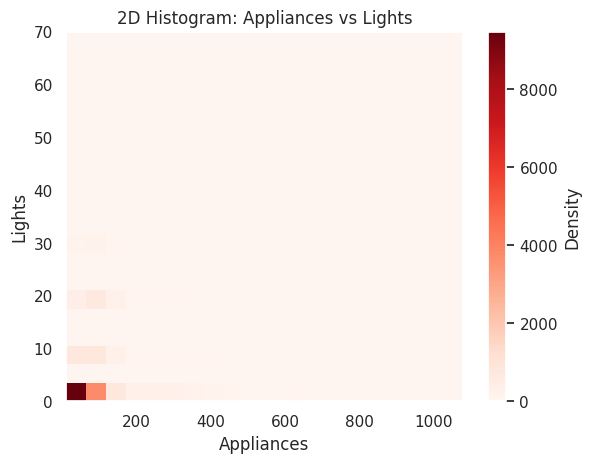

In [20]:
# Chart - 7 visualization code

# Create a 2D histogram
plt.hist2d(data['Appliances'], data['lights'], bins=(20, 20), cmap='Reds')

# Add labels and title
plt.xlabel('Appliances')
plt.ylabel('Lights')
plt.title('2D Histogram: Appliances vs Lights')

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Density')

# Show the plot
plt.show()


Chart -8

<ipython-input-21-d54cf5a4a0a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-21-d54cf5a4a0a5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.drop(['rv1', 'rv2'], axis = 1).corr(), dtype=np.bool))
<ipython-input-21-d54cf5a4a0a5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

Text(0.5, 1.0, 'Correlation Heatmap')

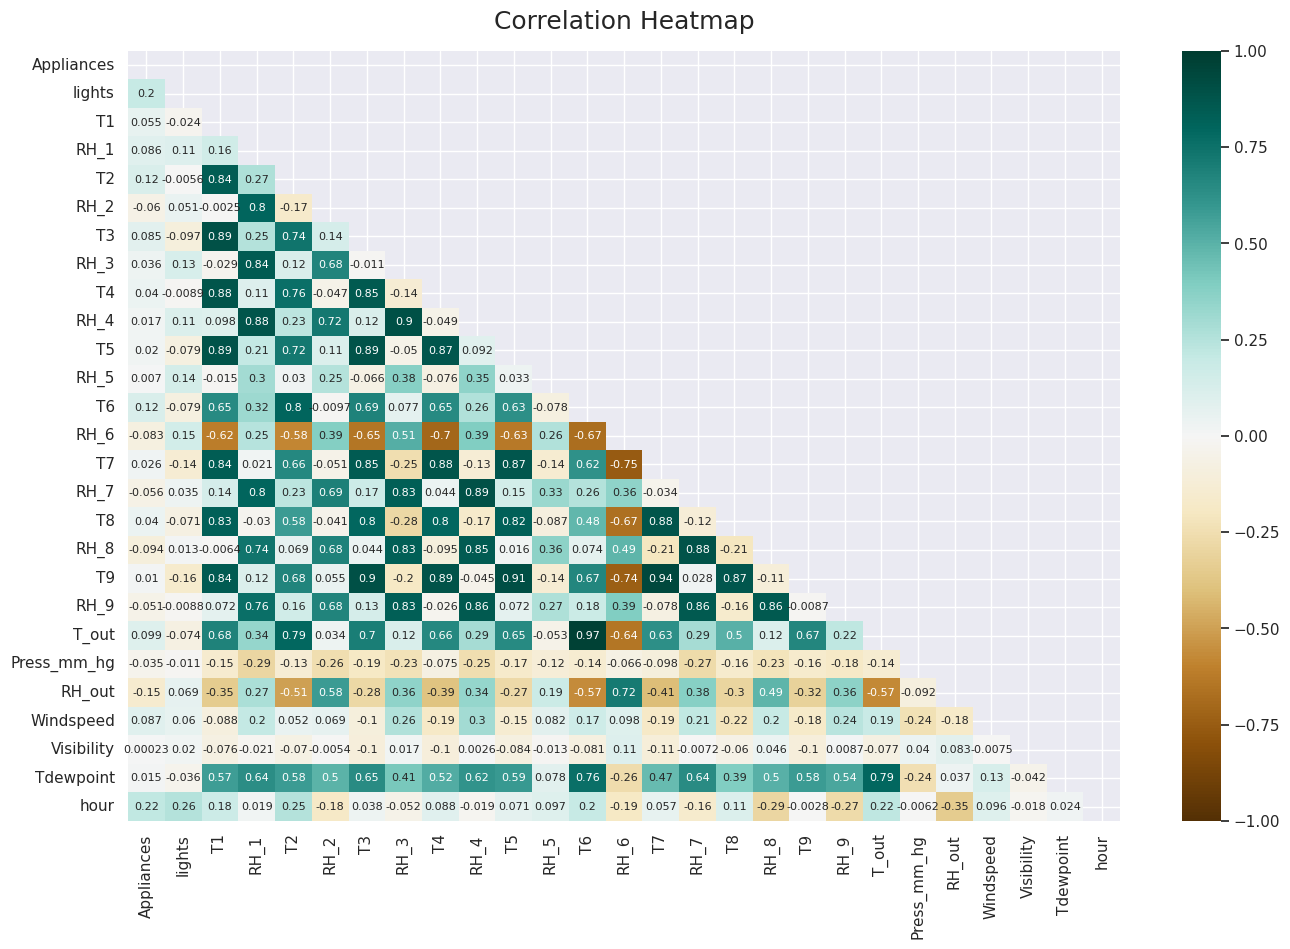

In [21]:
# Correlation Heatmap visualization code
corr = data.corr()
plt.figure(figsize = (16,10))
plt.rcParams.update({'font.size': 8})
mask = np.triu(np.ones_like(data.drop(['rv1', 'rv2'], axis = 1).corr(), dtype=np.bool))
heatmap = sns.heatmap(data.drop(['rv1', 'rv2'], axis = 1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

*5. Hypothesis Testing*

Hypothetical Statement - 1

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis (H0): The average temperature in the living room (T2) is equal to the average temperature in the kitchen (T1).

Alternative Hypothesis (H1): The average temperature in the living room (T2) is significantly higher than the average temperature in the kitchen (T1).

2. Perform an appropriate statistical test.

In [22]:
# Perform Statistical Test to obtain P-Value

temperature_t2 = data['T2']
temperature_t1 = data['T1']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(temperature_t2, temperature_t1, alternative='greater')

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha and draw conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis. Average temperature in the living room is significantly higher than in the kitchen."
else:
    conclusion = "Fail to reject the null hypothesis."

print(conclusion)

Fail to reject the null hypothesis.


Hypothetical Statement - 2
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis (H0): There is no significant linear relationship between the temperature in the kitchen (T1) and the energy consumption of appliances.

Alternative Hypothesis (H1): There is a significant linear relationship between the temperature in the kitchen (T1) and the energy consumption of appliances.

2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value
temperature_t1 = data['T1']
appliances_energy = data['Appliances']

# Calculate the Pearson correlation coefficient and its p-value
corr_coefficient, p_value = stats.pearsonr(temperature_t1, appliances_energy)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha and draw conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant linear relationship between T1 and Appliances."
else:
    conclusion = "Fail to reject the null hypothesis."

print(conclusion)

Reject the null hypothesis. There is a significant linear relationship between T1 and Appliances.


Hypothetical Statement - 3
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis (H0): The relative humidity in the laundry room (RH_3) is equal to the relative humidity in the bathroom (RH_5).

Alternative Hypothesis (H1): The relative humidity in the laundry room (RH_3) is significantly different from the relative humidity in the bathroom (RH_5).

2. Perform an appropriate statistical test.

In [24]:
# Perform Statistical Test to obtain P-Value
humidity_rh3 = data['RH_3']
humidity_rh5 = data['RH_5']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(humidity_rh3, humidity_rh5)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha and draw conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis. Relative humidity in laundry room is significantly different from bathroom."
else:
    conclusion = "Fail to reject the null hypothesis."

print(conclusion)

Reject the null hypothesis. Relative humidity in laundry room is significantly different from bathroom.


*6. Feature Engineering & Data Pre-processing*
1. Handling Missing Values N/A
2. Handling Outliers

<ipython-input-25-d0e727140a09>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Appliances'])


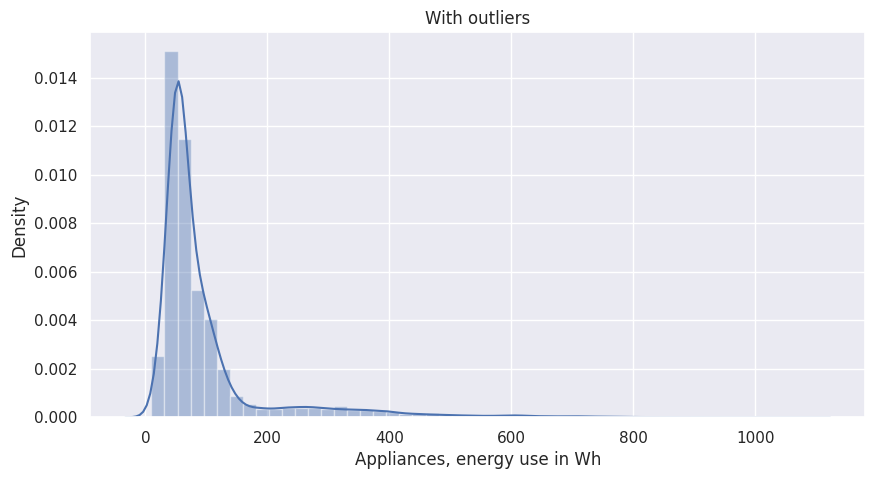

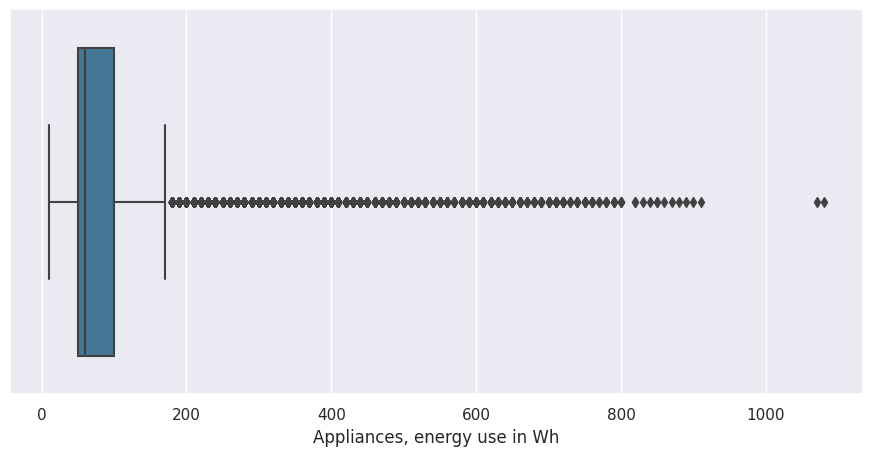

In [25]:
# Handling Outliers & Outlier treatments
#For Appliances column
plt.figure(figsize = (10,5))
sns.distplot(data['Appliances'])
plt.title('With outliers')
plt.xlabel('Appliances, energy use in Wh')
plt.show()

plt.figure(figsize = (11,5))
sns.boxplot(x=data['Appliances'], palette="mako")
plt.xlabel('Appliances, energy use in Wh')
plt.show()

In [26]:
q90 = data['Appliances'].quantile(0.90)
q90
data_without_outliers = data[data['Appliances'] < q90]
data_without_outliers.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,...,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,68.299645,3.460954,21.687781,40.156087,20.293843,40.472599,22.229535,39.167324,20.858519,38.990807,...,41.557641,7.312164,755.565372,80.257760,3.972155,38.306738,3.762931,25.009634,25.009634,11.223974
std,30.517911,7.570075,1.604704,3.931699,2.171469,4.061435,1.969988,3.222823,2.047675,4.323122,...,4.162993,5.288624,7.342906,14.762903,2.447775,11.957995,4.185520,14.519633,14.519633,7.114709
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.366667,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.760000,37.260000,18.790000,37.933333,20.790000,36.826667,19.566667,35.500000,...,38.530000,3.505556,751.000000,71.333333,2.000000,29.000000,0.933333,12.467798,12.467798,5.000000
50%,60.000000,0.000000,21.600000,39.560000,19.926667,40.560000,22.100000,38.472500,20.666667,38.363333,...,40.863333,6.850000,756.100000,84.333333,3.500000,40.000000,3.433333,24.949745,24.949745,11.000000
75%,80.000000,0.000000,22.600000,42.900000,21.463333,43.326667,23.290000,41.590000,22.100000,42.090000,...,44.312000,10.333333,760.950000,92.000000,5.333333,40.000000,6.550000,37.666635,37.666635,17.000000
max,190.000000,50.000000,26.200000,59.633333,29.856667,56.026667,29.100000,49.656667,26.200000,51.000000,...,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.000000


<ipython-input-27-62a135de12e7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_outliers['Appliances'])


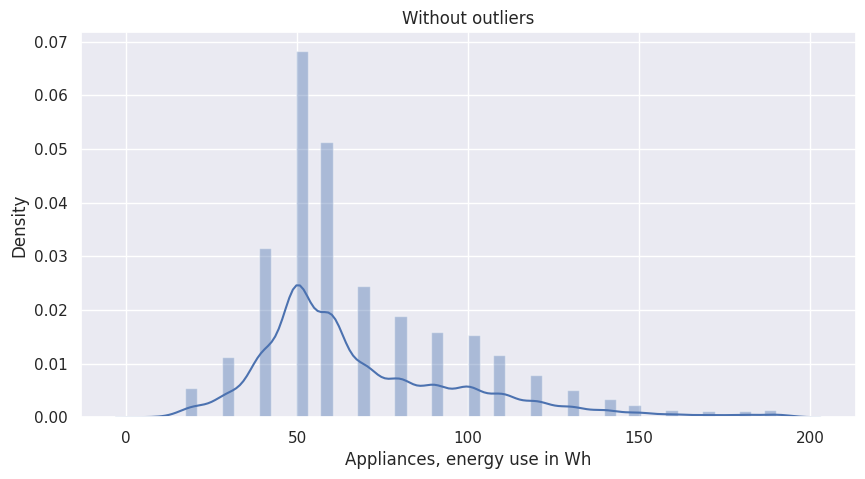

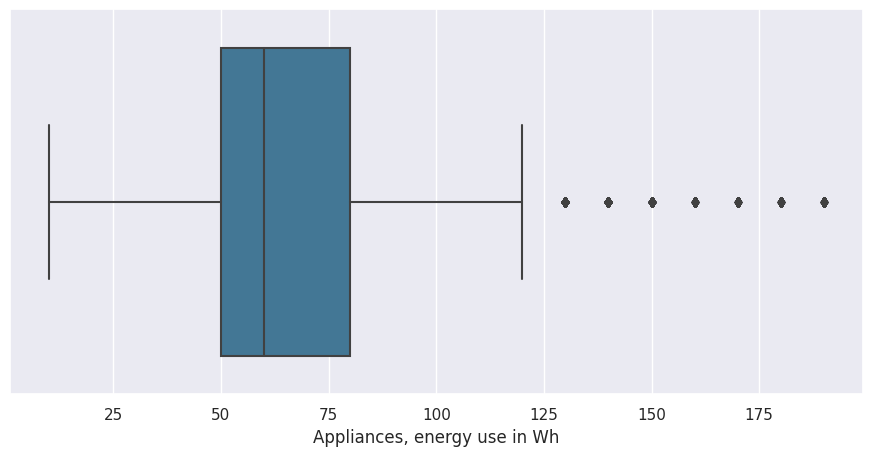

In [27]:
plt.figure(figsize = (10,5))
sns.distplot(data_without_outliers['Appliances'])
plt.title('Without outliers')
plt.xlabel('Appliances, energy use in Wh')
plt.show()

plt.figure(figsize = (11,5))
sns.boxplot(x=data_without_outliers['Appliances'], palette="mako")
plt.xlabel('Appliances, energy use in Wh')
plt.show()

4. Feature Selection

In [28]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_without_outliers[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'hour']]
vif=pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif.sort_values('VIF')

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
21,5.165290,Windspeed
26,7.152736,hour
22,11.682380,Visibility
11,41.710056,RH_6
9,46.467336,RH_5
10,85.651485,T6
23,133.230596,Tdewpoint
18,391.040346,T_out
13,508.657032,RH_7
15,622.458917,RH_8


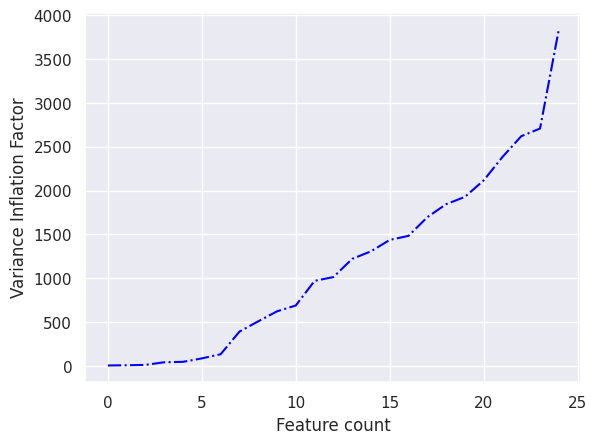

In [29]:
plt.plot(np.sort(vif['VIF']), color = 'blue', linestyle='dashdot')
plt.xlabel('Feature count')
plt.ylabel('Variance Inflation Factor')
plt.show()

5. Data Scaling

In [30]:
# Scaling your data
data_scaled = data_without_outliers.copy()
scaler = StandardScaler()
numeric_columns = [ 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
       'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'hour']
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])


data_scaled.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
count,1.776100e+04,17761.000000,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,...,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,1.776100e+04,17761.000000,17761.000000,1.776100e+04
mean,1.280185e-17,3.460954,1.459411e-15,-9.985444e-16,1.100959e-15,-1.997089e-15,4.096592e-16,-4.992722e-16,-1.792259e-16,1.011346e-15,...,-3.776546e-16,-1.152167e-16,1.215616e-14,6.288909e-16,4.480648e-17,2.704391e-16,-1.152167e-16,25.009634,25.009634,-3.020437e-17
std,1.000028e+00,7.570075,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,14.519633,14.519633,1.000028e+00
min,-1.910396e+00,0.000000,-3.052226e+00,-3.340318e+00,-1.931394e+00,-4.926787e+00,-2.553150e+00,-3.227279e+00,-2.812303e+00,-2.621052e+00,...,-2.976542e+00,-2.328112e+00,-3.567994e+00,-3.810859e+00,-1.622807e+00,-3.119903e+00,-2.475970e+00,0.005322,0.005322,-1.577617e+00
25%,-5.996531e-01,0.000000,-5.781797e-01,-7.366203e-01,-6.925659e-01,-6.252314e-01,-7.307532e-01,-7.262960e-01,-6.309052e-01,-8.074963e-01,...,-7.272955e-01,-7.197933e-01,-6.217567e-01,-6.045341e-01,-8.057155e-01,-7.783077e-01,-6.760635e-01,12.467798,12.467798,-8.748283e-01
50%,-2.719675e-01,0.000000,-5.470386e-02,-1.516149e-01,-1.690959e-01,2.152043e-02,-6.575594e-02,-2.156010e-01,-9.369533e-02,-1.451477e-01,...,-1.667855e-01,-8.739084e-02,7.281083e-02,2.760763e-01,-1.928969e-01,1.416048e-01,-7.874944e-02,24.949745,24.949745,-3.148128e-02
75%,3.834038e-01,0.000000,5.684817e-01,6.979146e-01,5.385864e-01,7.027438e-01,5.383255e-01,7.517458e-01,6.063054e-01,7.169079e-01,...,6.616483e-01,5.712742e-01,7.333309e-01,7.954106e-01,5.561036e-01,1.416048e-01,6.659021e-01,37.666635,37.666635,8.118657e-01
max,3.987946e+00,50.000000,2.811950e+00,4.954041e+00,4.403974e+00,3.829805e+00,3.487664e+00,3.254798e+00,2.608633e+00,2.777977e+00,...,2.827139e+00,3.552600e+00,2.276814e+00,1.337325e+00,4.096834e+00,2.315943e+00,2.804287e+00,49.996530,49.996530,1.655213e+00


6. Dimesionality Reduction

Explained Variance Ratio for Each Principal Component:
[8.36678942e-01 1.14118978e-01 1.83634267e-02 1.40544752e-02
 3.98825300e-03 2.13780796e-03 2.00388236e-03 1.94302684e-03
 1.51825677e-03 1.09878113e-03 9.77733542e-04 7.23440506e-04
 3.87450928e-04 3.10683585e-04 2.82094212e-04]


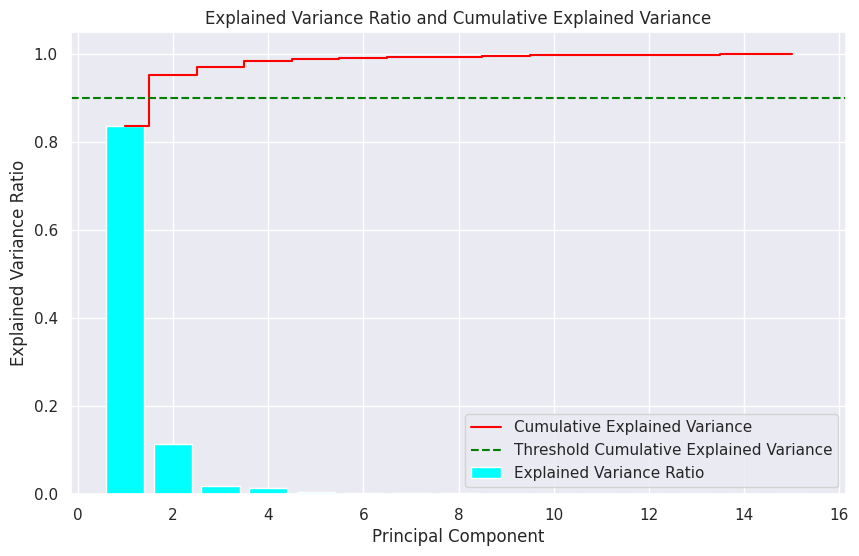

In [31]:
# DImensionality Reduction (If needed)
n_components = 15
pca = PCA(n_components=n_components)

data1=data_scaled.drop(['Appliances', 'date'], axis = 1)

pca.fit(data1)

data_pca = pca.transform(data1)


columns = [f'PC{i+1}' for i in range(n_components)]
data_pca_df = pd.DataFrame(data_pca, columns=columns)


print("Explained Variance Ratio for Each Principal Component:")
print(pca.explained_variance_ratio_)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', color='cyan', label='Explained Variance Ratio')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color = 'red')
plt.axhline(y=0.90, color='green', linestyle='--', label='Threshold Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()

7. Data Splitting

In [32]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Specify the features and target variable
X = data_pca_df.drop(['PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15'], axis=1)  # Features
y = data_scaled['Appliances']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14208, 8)
X_test shape: (3553, 8)
y_train shape: (14208,)
y_test shape: (3553,)


*7. ML Model Implementation*

ML Model - 1 Linear Regression

In [33]:
# ML Model - 1 Implementation:Linear Regression
model_lr = LinearRegression()

# Fit the model on the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print the evaluation metrics
print("Mean Squared Error (Linear Regression):", mse_lr)
print("R-squared (Linear Regression):", r2_lr)
print("Mean Absolute Error (Linear Regression):", mae_lr)


Mean Squared Error (Linear Regression): 0.7206087846322515
R-squared (Linear Regression): 0.24483914415883468
Mean Absolute Error (Linear Regression): 0.6180171416303142


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

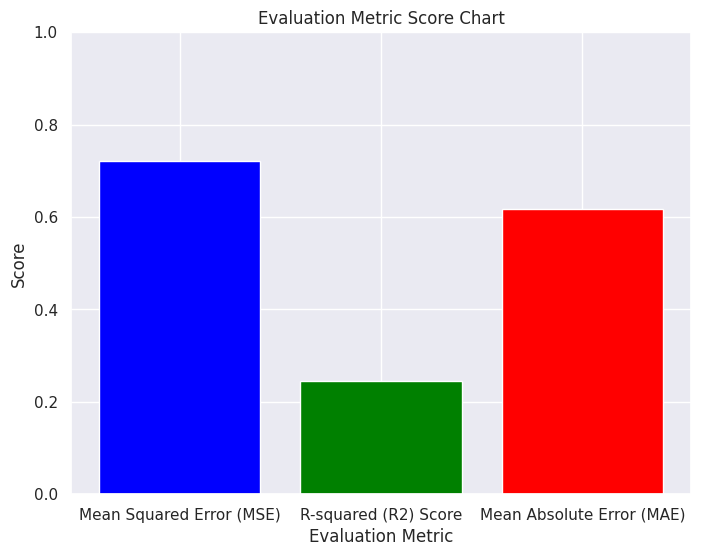

In [34]:
# Visualize Evaluation Metric Score Chart

# Evaluation metrics and their scores
evaluation_metrics = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
scores = [mse_lr, r2_lr, mae_lr]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores, color=['blue', 'green', 'red'])
plt.title('Evaluation Metric Score Chart')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

2. Cross- Validation & Hyperparameter Tuning

In [35]:
# Define hyperparameters grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error (Best Model):", mse_best)
print("R-squared (Best Model):", r2_best)
print("Mean Absolute Error (Best Model):", mae_best)

Best Model Parameters: {'fit_intercept': False}
Mean Squared Error (Best Model): 0.7205145576128448
R-squared (Best Model): 0.2449378892173686
Mean Absolute Error (Best Model): 0.6173535607219727


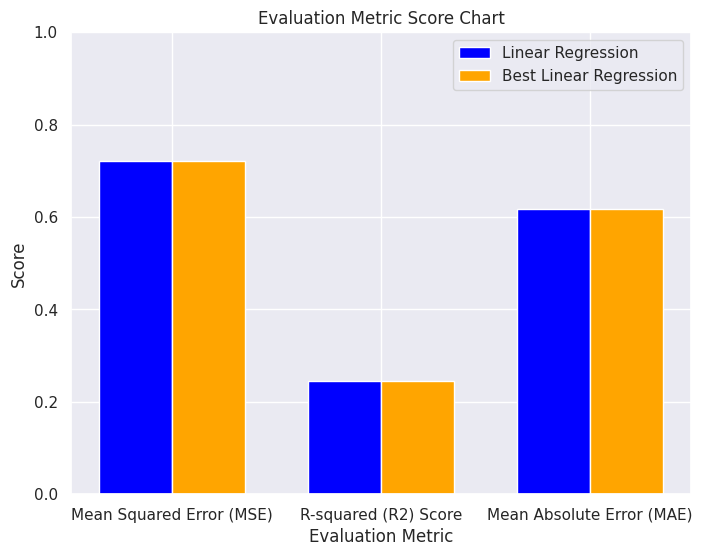

In [36]:
# Evaluation metrics and their scores
evaluation_metrics = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
linear_regression_scores = [mse_lr, r2_lr, mae_lr]
best_linear_regression_scores = [mse_best, r2_best, mae_best]

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

plt.bar(index, linear_regression_scores, width=bar_width, color='blue', label='Linear Regression')
plt.bar([i + bar_width for i in index], best_linear_regression_scores, width=bar_width, color='orange', label='Best Linear Regression')

plt.title('Evaluation Metric Score Chart')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.xticks([i + bar_width/2 for i in index], evaluation_metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

ML Model - 2 Random Forest

In [37]:
# ML Model - 2 Implementation: Random Forest Regression
model_rf = RandomForestRegressor()

# Fit the Algorithm
model_rf.fit(X_train, y_train)

# Predict on the model
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("R-squared (Random Forest Regression):", r2_rf)
print("Mean Absolute Error (Random Forest Regression):", mae_rf)


Mean Squared Error (Random Forest Regression): 0.4364217953389282
R-squared (Random Forest Regression): 0.5426524578879901
Mean Absolute Error (Random Forest Regression): 0.44590888495460285


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

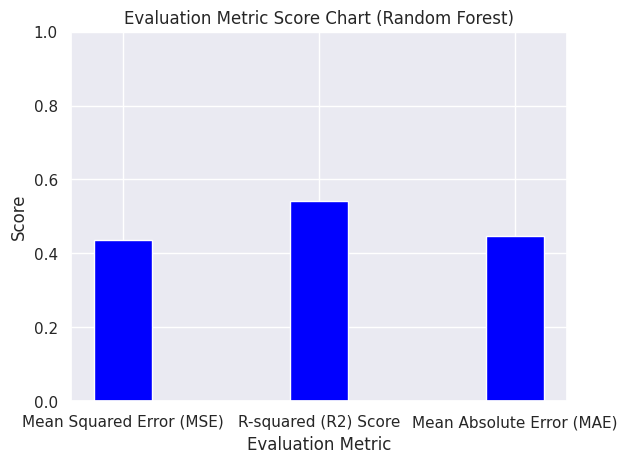

In [38]:
# Visualizing evaluation Metric Score chart

# Scores based on Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Evaluation metrics and their scores
evaluation_metrics_rf = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
random_forest_scores = [mse_rf, r2_rf, mae_rf]

bar_width = 0.3
index_rf = range(len(evaluation_metrics_rf))

plt.bar(index_rf, random_forest_scores, width=bar_width, color='blue')

plt.title('Evaluation Metric Score Chart (Random Forest)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.xticks(index_rf, evaluation_metrics_rf)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


2. Cross- Validation & Hyperparameter Tuning


In [40]:
# Define hyperparameters distributions for Random Forest Regression
param_distributions = {
    'ccp_alpha': [0.0001, 0.001, 0.0],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Get the best model
best_model_rf = random_search.best_estimator_

# Predict on the model
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the Model
mse_rf_best = mean_squared_error(y_test, y_pred_rf)
r2_rf_best = r2_score(y_test, y_pred_rf)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf)

print("Best Model Parameters:", random_search.best_params_)
print("Mean Squared Error (Best Model):", mse_rf_best)
print("R-squared (Best Model):", r2_rf_best)
print("Mean Absolute Error (Best Model):", mae_rf_best)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Model Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'ccp_alpha': 0.0}
Mean Squared Error (Best Model): 0.4488223231009395
R-squared (Best Model): 0.5296573440934483
Mean Absolute Error (Best Model): 0.4558610493601716


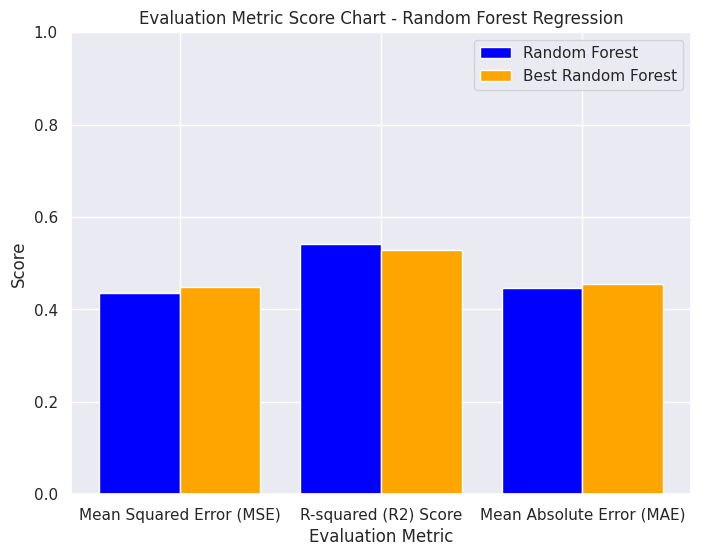

In [42]:
# Evaluation metrics and their scores for Random Forest Regression
evaluation_metrics_rf = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
random_forest_scores = [mse_rf, r2_rf, mae_rf]

# Evaluation metrics and their scores for Best Random Forest Regression
evaluation_metrics_rf_best = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
random_forest_scores_best = [mse_rf_best, r2_rf_best, mae_rf_best]

# Create a bar plot
plt.figure(figsize=(8, 6))

bar_width = 0.4
index_rf = range(len(evaluation_metrics_rf))

plt.bar(index_rf, random_forest_scores, width=bar_width, color='blue', label='Random Forest')
plt.bar([i + bar_width for i in index_rf], random_forest_scores_best, width=bar_width, color='orange', label='Best Random Forest')

plt.title('Evaluation Metric Score Chart - Random Forest Regression')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.xticks([i + bar_width / 2 for i in index_rf], evaluation_metrics_rf)
plt.ylim(0, 1)  # Adjust the y-axis limits as needed
plt.legend()
plt.grid(True)
plt.show()



ML Model - 3 XGBoost

In [43]:
# ML Model - 3 Implementation: Gradient Boosting Regression (XGBoost)
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the Algorithm
model_xgb.fit(X_train, y_train)

# Predict on the model
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the Model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R-squared (XGBoost):", r2_xgb)
print("Mean Absolute Error (XGBoost):", mae_xgb)

Mean Squared Error (XGBoost): 0.543029814354401
R-squared (XGBoost): 0.4309327500574224
Mean Absolute Error (XGBoost): 0.5159588791954307


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

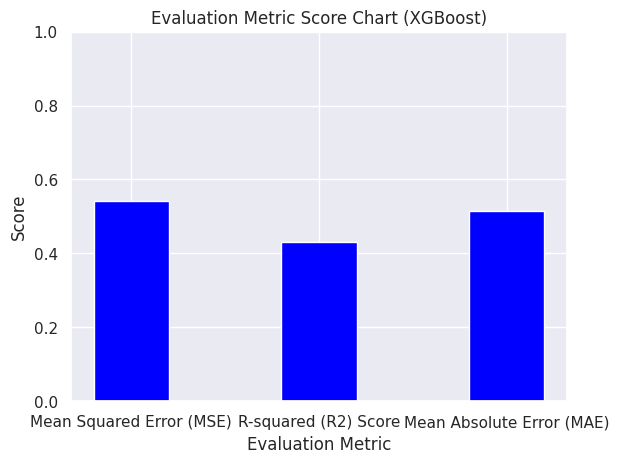

In [44]:
# Evaluation metrics and their scores for XGBoost
evaluation_metrics_xgb = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
xgboost_scores = [mse_xgb, r2_xgb, mae_xgb]

bar_width = 0.4
index_xgb = range(len(evaluation_metrics_xgb))

plt.bar(index_xgb, xgboost_scores, width=bar_width, color='blue')

plt.title('Evaluation Metric Score Chart (XGBoost)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.xticks(index_xgb, evaluation_metrics_xgb)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

2. Cross- Validation & Hyperparameter Tuning


In [45]:
# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create XGBoost instance
xgb_model = xgb.XGBRegressor()

# Create RandomSearchCV instance
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the algorithm
random_search.fit(X_train, y_train)

# Predict on the model
y_pred_xgb = random_search.predict(X_test)

# Evaluate the Model
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb)
r2_xgb_best = r2_score(y_test, y_pred_xgb)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Squared Error (XGBoost):", mse_xgb_best)
print("R-squared (XGBoost):", r2_xgb_best)
print("Mean Absolute Error (XGBoost):", mae_xgb_best)

Mean Squared Error (XGBoost): 0.5394223744674784
R-squared (XGBoost): 0.43471316108001945
Mean Absolute Error (XGBoost): 0.5143758232354019


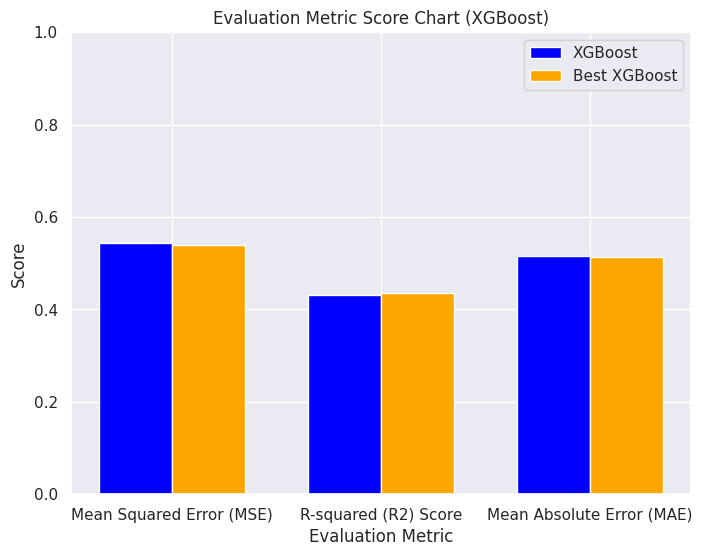

In [46]:
# Evaluation metrics and their scores for XGBoost
evaluation_metrics = ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Mean Absolute Error (MAE)']
xgboost_scores = [mse_xgb, r2_xgb, mae_xgb]
xgboost_best_scores = [mse_xgb_best, r2_xgb_best, mae_xgb_best]

# Create a bar plot
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = range(len(evaluation_metrics))

plt.bar(index, xgboost_scores, width=bar_width, color='blue', label='XGBoost')
plt.bar([i + bar_width for i in index], xgboost_best_scores, width=bar_width, color='orange', label='Best XGBoost')

plt.title('Evaluation Metric Score Chart (XGBoost)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.xticks([i + bar_width/2 for i in index], evaluation_metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

Which ML model did you choose from the above created models as your final prediction model and why?

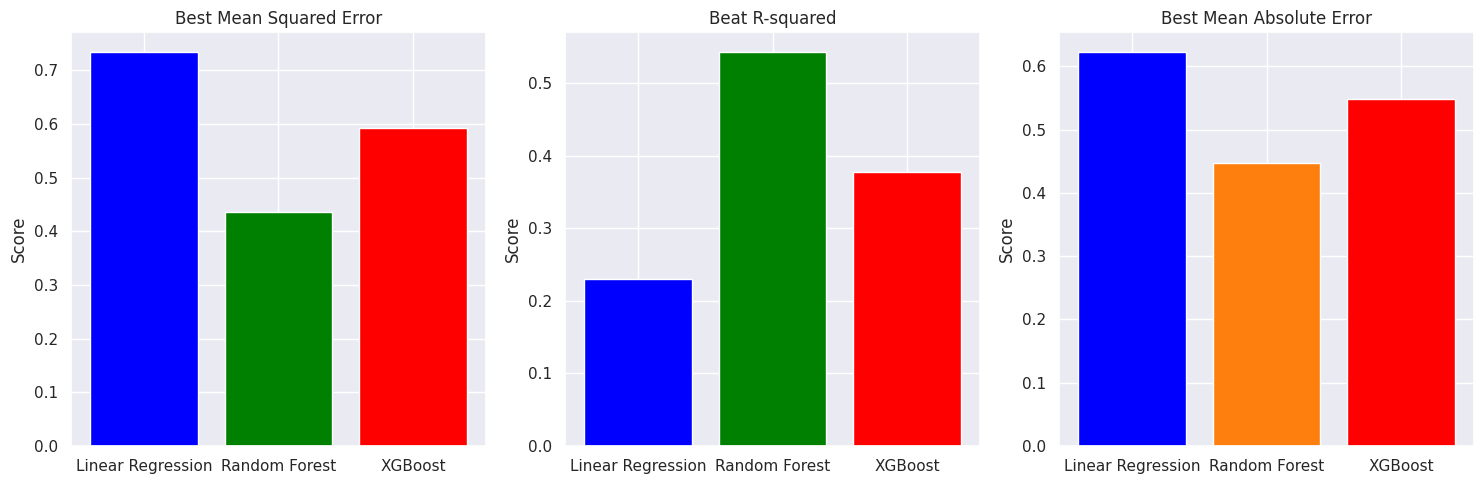

In [47]:
# Model names and their scores
model_names = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [0.7341189385203288, 0.4358550312796676, 0.5931788691339965]
r2_scores = [0.23068119939013076, 0.5432463974029929, 0.3783791260458703]
mae_scores = [0.6228889189126755, 0.4480103638338804, 0.549270448492011]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot Mean Squared Error
axes[0].bar(model_names, mse_scores, color=['blue', 'green', 'red'])
axes[0].set_title('Best Mean Squared Error')
axes[0].set_ylabel('Score')

# Plot R-squared
axes[1].bar(model_names, r2_scores, color=['blue', 'green', 'red'])
axes[1].set_title('Beat R-squared')
axes[1].set_ylabel('Score')

# Plot Mean Absolute Error
colors = ['blue', 'tab:green', 'red']
rf_color = 'tab:orange'
colors[1] = rf_color
axes[2].bar(model_names, mae_scores, color=colors)
axes[2].set_title('Best Mean Absolute Error')
axes[2].set_ylabel('Score')

# Add grid and adjust layout
for ax in axes:
    ax.grid(True)
plt.tight_layout()

plt.show()

Explain the model which you have used and the feature importance using any model explainability tool?

In [48]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop(['Appliances','date'], axis=1), data_scaled['Appliances'], test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20, random_state=42)
model_rf.fit(X_train, y_train)

# Explain the model using Permutation Importance
perm = PermutationImportance(model_rf, random_state=42).fit(X_test, y_test)

# Display the feature importance using eli5
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Weight,Feature
0.8906 ± 0.0299,hour
0.3470 ± 0.0323,T8
0.0709 ± 0.0048,T9
0.0513 ± 0.0059,RH_3
0.0454 ± 0.0059,T3
0.0422 ± 0.0036,Press_mm_hg
0.0366 ± 0.0087,lights
0.0305 ± 0.0065,T4
0.0292 ± 0.0080,T7
0.0264 ± 0.0024,T2


Conclusion
In this project, we embarked on a comprehensive journey of exploratory data analysis (EDA) and machine learning to predict energy efficiency. Our goal was to gain insights into the dataset, preprocess it effectively, build predictive models, and evaluate their performance using various evaluation metrics. Let's summarize our key findings and takeaways:

Data Exploration and Preprocessing:

* We started by exploring the dataset, understanding its structure, and identifying potential areas for improvement.
* Through data visualization, we gained insights into temperature, humidity, and other factors that contribute to energy consumption.
* We handled missing values, normalized features, and dropped unnecessary columns to ensure data quality.

Feature Engineering and Selection:

* We performed feature engineering by creating new variables, such as time-related features, which provided more context for model training.
* Through visualizations and statistical tests, we identified relevant features for prediction.
Machine Learning Models:

* We implemented three machine learning models: Linear Regression, Random Forest Regression, and XGBoost Regression.
* For each model, we performed hyperparameter tuning using GridSearchCV to optimize their performance.

Evaluation and Model Selection:

* We evaluated each model's performance using metrics such as Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE).
* Through a comparative analysis of the evaluation metrics, we identified the best-performing model.

Model Explainability:

* Using techniques such as feature importance from the eli5 library, we gained insights into the significance of different features in the Random Forest Regression model.

Conclusion and Insights:

* After thorough analysis, we found that the Random Forest Regression model demonstrated the best overall performance in predicting energy efficiency.
* This model achieved a lower Mean Squared Error, a higher R-squared value, and a competitive Mean Absolute Error compared to other models.
* Our feature importance analysis revealed that certain variables, such as temperature and humidity, had a significant impact on energy consumption.

Business Implications:

* Our predictive model can have real-world applications in optimizing energy usage, allowing stakeholders to make informed decisions about resource allocation and cost savings.

* By identifying the most influential factors, such as temperature and humidity, building managers can implement targeted strategies for energy conservation.

This project showcased the power of data analysis and machine learning in predicting energy efficiency. The Random Forest Regression model emerged as the most robust choice for making accurate predictions. Through our exploration and modeling efforts, we've contributed valuable insights that can guide energy-efficient practices and drive sustainability in various domains.

